In [108]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
data = pd.read_excel("C:\\Users\\EdwinVivekN\\Desktop\\Book1.xlsx", sheet_name="Sheet1")
data

,year,f2
0,2021-01-01,100.0
1,2021-02-02,200.0
2,2021-03-03,200.0
3,2021-04-04,100.0
4,2021-05-05,300.0
5,2021-06-06,200.0
6,2021-07-07,300.0
7,2021-08-08,600.0
8,2021-09-09,500.0
9,2021-10-10,400.0


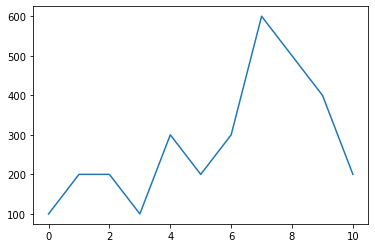

In [165]:
plt.plot(data.index, data["f2"])

In [167]:
index= pd.date_range(start='2021-01-01', end='2022-3-3', freq='M')
data.index = index
data.drop("year", axis=1, inplace=True)
print(data)

               f2
2021-01-31  100.0
2021-02-28  200.0
2021-03-31  200.0
2021-04-30  100.0
2021-05-31  300.0
2021-06-30  200.0
2021-07-31  300.0
2021-08-31  600.0
2021-09-30  500.0
2021-10-31  400.0
2021-11-30  200.0
2021-12-31    NaN
2022-01-31    NaN
2022-02-28    NaN


In [171]:
train = data.iloc[0:-3,:]
test = data.iloc[-3:,:]

,f2
2021-12-31,NaN
2022-01-31,NaN
2022-02-28,NaN


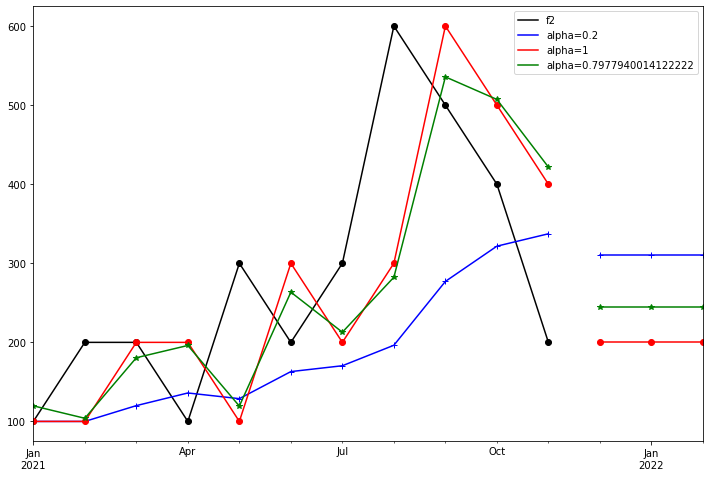

In [173]:
#Simple Exponential Smoothing

#First Instance
ins1 = SimpleExpSmoothing(train).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train).fit(smoothing_level=1,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=1')

#Third Instance
ins3 = SimpleExpSmoothing(train).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = train.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')


In [174]:
#Holt Winter's Linear smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
model = Holt(np.asarray(train))
model

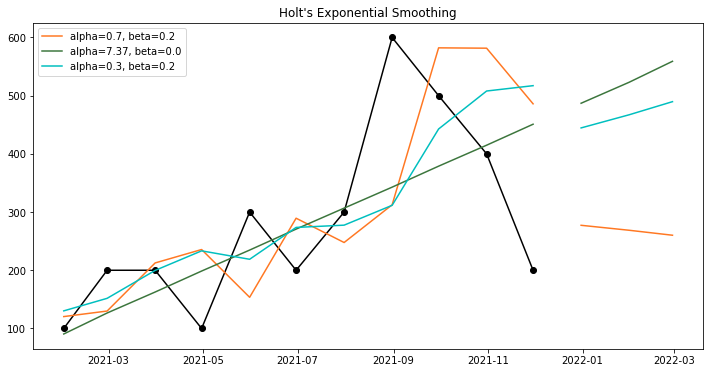

In [192]:
fit1 = model.fit(smoothing_level=0.7, smoothing_slope=0.2)
pred1 = fit1.forecast(3)
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(3)
fit3 = model.fit(smoothing_level=.3, smoothing_slope=.2)
pred3 = fit3.forecast(3)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train, marker='o', color='black')


for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[:], f.fittedvalues[:], color=c)
    ax.plot(test.index[:], p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_slope'])[:4], color=c)
plt.title("Holt's Exponential Smoothing")
plt.legend();

In [188]:
fit1 = model.fit(smoothing_level=1, smoothing_slope=0.2)
pred1 = fit1.forecast(3)
fit1.fittedvalues

array([ 99.99981145, 126.20393371, 240.96314697, 232.77051757,
       106.21641406, 344.97313125, 215.978505  , 332.782804  ,
       686.2262432 , 548.98099456, 419.18479565])

In [189]:
pred1

array([175.34783652, 150.69567304, 126.04350955])